# First Step - Simple Model
#### 1. Get Data from inbuilt torchvision modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from skimage import transform

from torch.autograd import Variable

from torch.utils.data import Dataset, DataLoader
# from vis_utils import *

print(torch.cuda.is_available())

True


In [3]:
dat = torchvision.datasets.FashionMNIST(root='dataset', download=True)

In [4]:
!dir dataset\processed

 Volume in drive C is SSD (180 GB)
 Volume Serial Number is 1CB6-8F6E

 Directory of C:\python\2018-11-11 Fashion MNIST\dataset\processed

11/11/2018  12:58    <DIR>          .
11/11/2018  12:58    <DIR>          ..
11/11/2018  12:58         7,920,427 test.pt
11/11/2018  12:58        47,520,427 training.pt
               2 File(s)     55,440,854 bytes
               2 Dir(s)   4,574,105,600 bytes free


In [1]:
# Define training parameters
num_epochs = 5;
batch_size = 100;
learning_rate = 0.001;

In [6]:
# ETL class
class FashionMNISTDataset(Dataset):
    '''Fashion MNIST Dataset'''
    
    def __init__(self, csv_file, transform=None):
        """
        Args:
        csv_file (string): Path to the csv file
        transform (callable): Optional transform to apply to sample
        """
        data = pd.read_csv(csv_file);
        self.X = np.array(data.iloc[:, 1:]).reshape(-1, 1, 28, 28)#.astype(float);
        self.Y = np.array(data.iloc[:, 0]);
        del data;
        self.transform = transform;
        
    def __len__(self):
        return len(self.X);
    
    def __getitem__(self, idx):
        item = self.X[idx];
        label = self.Y[idx];
        if self.transform:
            item = self.transform(item);
        return (item, label);
    

In [9]:
# Get data from csv
train_dataset = FashionMNISTDataset(csv_file='data/fashion-mnist_train.csv')
test_dataset = FashionMNISTDataset(csv_file='data/fashion-mnist_test.csv')

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True);
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True);

In [13]:
# Establish label maps
labels_map = {0 : '0. T-Shirt',
              1 : '1. Trouser',
              2 : '2. Pullover',
              3 : '3. Dress',
              4 : '4. Coat',
              5 : '5. Sandal',
              6 : '6. Shirt',
              7 : '7. Sneaker',
              8 : '8. Bag',
              9 : '9. Ankle Boot'};

fig = plt.figure(figsize=(8,8));
columns = 4;
rows = 5;

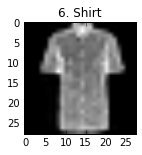

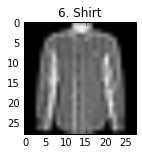

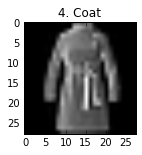

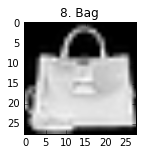

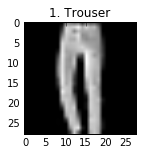

In [14]:
# Random output of image classes

for i in range(5):
    fig = plt.figure(figsize=(4,2));
    img_xy = np.random.randint(len(train_dataset))
    img = train_dataset[img_xy][0][0,:,:]
    label = labels_map[train_dataset[img_xy][1]]
    plt.title(labels_map[train_dataset[img_xy][1]])
    plt.imshow(img, cmap='gray')
    plt.show()

### Pytorch CNN Model

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [17]:
# Create instance
cnn = CNN()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

In [18]:
losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.float())
        labels = Variable(labels)
        
        # Forward pass, backprop and optimisation
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        losses.append(loss.data[0])    
        
        if (i+1) % 100 == 0:
            print ('Epoch : %d/%d, Iter : %d/%d, Loss: %.4f' % 
                   (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch : 1/5, Iter : 100/600, Loss: 0.4438
Epoch : 1/5, Iter : 200/600, Loss: 0.3529
Epoch : 1/5, Iter : 300/600, Loss: 0.4963
Epoch : 1/5, Iter : 400/600, Loss: 0.3653
Epoch : 1/5, Iter : 500/600, Loss: 0.4817
Epoch : 1/5, Iter : 600/600, Loss: 0.2152
Epoch : 2/5, Iter : 100/600, Loss: 0.2383
Epoch : 2/5, Iter : 200/600, Loss: 0.2783
Epoch : 2/5, Iter : 300/600, Loss: 0.1361
Epoch : 2/5, Iter : 400/600, Loss: 0.2788
Epoch : 2/5, Iter : 500/600, Loss: 0.3947
Epoch : 2/5, Iter : 600/600, Loss: 0.1990
Epoch : 3/5, Iter : 100/600, Loss: 0.2905
Epoch : 3/5, Iter : 200/600, Loss: 0.2826
Epoch : 3/5, Iter : 300/600, Loss: 0.1969
Epoch : 3/5, Iter : 400/600, Loss: 0.2790
Epoch : 3/5, Iter : 500/600, Loss: 0.3554
Epoch : 3/5, Iter : 600/600, Loss: 0.2060
Epoch : 4/5, Iter : 100/600, Loss: 0.2770
Epoch : 4/5, Iter : 200/600, Loss: 0.1427
Epoch : 4/5, Iter : 300/600, Loss: 0.2443
Epoch : 4/5, Iter : 400/600, Loss: 0.1853
Epoch : 4/5, Iter : 500/600, Loss: 0.2756
Epoch : 4/5, Iter : 600/600, Loss:

#### Evaluating the model 

In [19]:
cnn.eval()
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.float())
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Test Accuracy of the model on the 10000 test images: %.4f %%' % (100 *
correct / total))

Test Accuracy of the model on the 10000 test images: 90.0000 %


"""

Todo: 
* look at incorrect predicitons
* try augmenting the original data to see if it helps
* try iteration and augmenting the test input
* try bring a new test image with a new perspective the model hasn't seen yet.

"""

### Visualising the loss

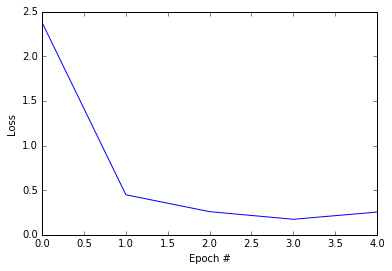

In [20]:
losses_in_epochs = losses[0::600]
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show();